## First function: Mapping data

** The objective of the function is to generate maps of the HDF files.**

The function will be of the type:
```
def(file, title, figure):
    get precipitation data
    using matplotlib display map of precipitation 
    provide title to the figure
    save map 
```
--    
    
This took a long time, but eventually the first map was produced! Note: An error message occur because of deprecation but the data are stored and displayed correctly.

Two data samples are included in the /data/2015 repo.

The function can be improved to read months automatically so there will be no need to manually input titles. However, the main maps will display averages and differences rather than monthly rainfall so inputting titles manually is acceptable at this stage.


/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3630: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3699: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


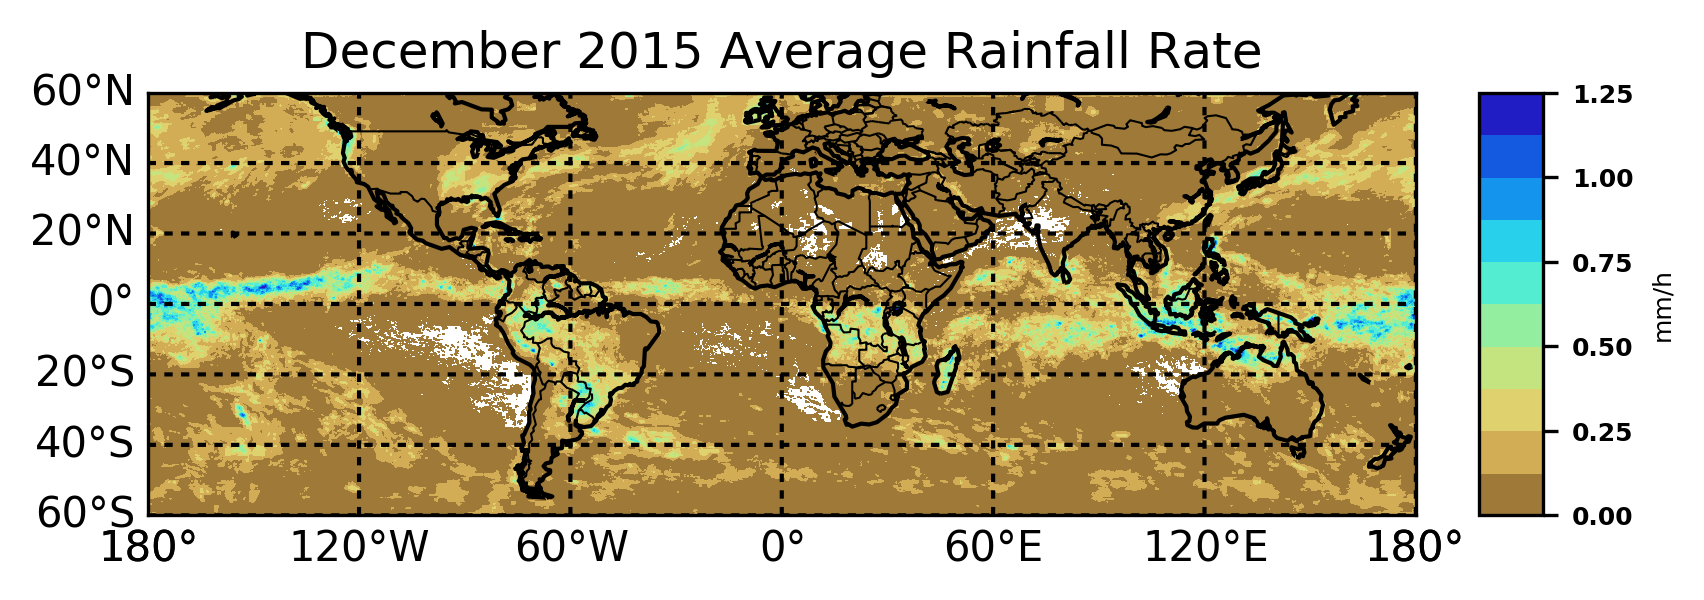

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1]:
# import libraries and modules
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py as h5py

def mapplot(filename, title_name, fig_path):
    #this function maps the results of a HDF5 file. the function takes three arguments (the path to the filename, 
    #the desired title for the image, and the path to where the plot should be saved)

    dataset = h5py.File(filename, 'r') 
    
    # Get precipitation data only
    precip = dataset['Grid/precipitation'][:]
    precip = np.transpose(precip)

    # Get longitudes and latitudes
    theLats = dataset['Grid/lat'][:]
    theLons = dataset['Grid/lon'][:]

    # Plot the figure, define the geographic bounds
    fig = plt.figure(dpi=300)
    latcorners = ([-60,60])
    loncorners = ([-180,180])

    m = Basemap(projection='cyl',llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])

    # Draw coastlinescountry boundaries, edge of map.
    m.drawcoastlines()
    # m.drawstates() # no need for states, but can use this in the future
    m.drawcountries()

    # Draw filled contours.
    clevs = np.arange(0,1.26,0.125)

    # Define the latitude and longitude data
    x, y = np.float32(np.meshgrid(theLons, theLats))

    # Mask the values less than 0 because there is no data to plot.
    masked_array = np.ma.masked_where(precip < 0,precip) # this needed to be corrected - it was incorrectly typed in the data recipe!

    # Plot every masked value as white
    cmap = cm.GMT_drywet
    cmap.set_bad('w',1.)

    # Plot the data
    cs = m.contourf(x,y,precip,clevs,cmap=cmap,latlon=True) # reports error due to deprecation but produces map correctly
    parallels = np.arange(-60.,61,20.)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(-180.,180.,60.)
    m.drawmeridians(meridians,labels=[False,False,False,True])

    #Set the title and fonts
    plt.title(title_name)
    font = {'weight' : 'bold', 'size' : 6}
    plt.rc('font', **font)

    #Add colorbar
    cbar = m.colorbar(cs,location='right',pad="5%")
    cbar.set_label('mm/h')
    plt.savefig(fig_path,dpi=200)

    #Display plot
    image = mpimg.imread(fig_path)
    plt.imshow(image)
    plt.show(image)

mapplot(filename = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151201-S000000-E235959.12.V03D.HDF5", title_name = "December 2015 Average Rainfall Rate", fig_path = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/dec2015.png")